In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Part A

def tuningCurves(A, x, mu, sigma):    
    return A * np.exp(-((x - mu) ** 2) / (2 * (sigma ** 2)))


In [3]:
mu = np.arange(-10,11)
responses = []
for i in range(len(mu)):
    responses.append(tuningCurves(1,np.linspace(-16, 17, 750), mu[i],1))

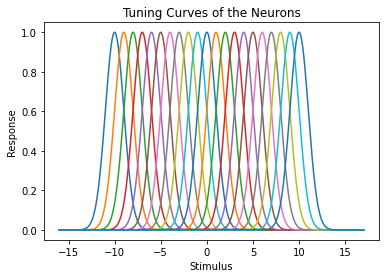

In [4]:
fig_num = 0
plt.figure(fig_num)
plt.title('Tuning Curves of the Neurons')
plt.xlabel('Stimulus')
plt.ylabel('Response')
for i in range(len(responses)):
    plt.plot(np.linspace(-16, 17, 750), responses[i])
plt.show(block=False)

In [5]:
response_x = []
for i in range(len(mu)):
    response_x.append(tuningCurves(1,-1, mu[i],1))

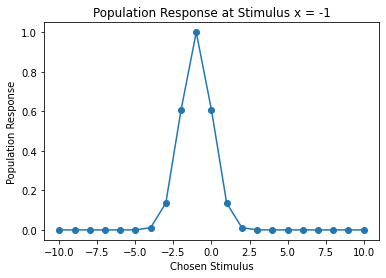

In [6]:
fig_num += 1
plt.figure(fig_num)
plt.title('Population Response at Stimulus x = -1')
plt.xlabel('Chosen Stimulus')
plt.ylabel('Population Response')
plt.plot(mu, response_x, marker='o')
plt.show(block=False)

In [7]:
# Part B

numberOfTrials = 200
responses_B = []
stimuli = []
est_WTA = []
error_WTA = []
np.random.seed(7)
for i in range(numberOfTrials):
    response_B = []
    random = 10 * np.random.random_sample() - 5
    stimuli.append(random)
    for k in range(len(mu)):
        response_B.append(tuningCurves(1,stimuli[i], mu[k],1))
    response_B = response_B + np.random.normal(0, 0.05, 21)
    chosen_index = np.argmax(response_B)
    est_WTA.append(mu[chosen_index])
    error_WTA.append(np.abs(stimuli[i] - est_WTA[i]))
    responses_B.append(response_B)
error_WTA_mean = np.mean(error_WTA)
error_WTA_std = np.std(error_WTA)   

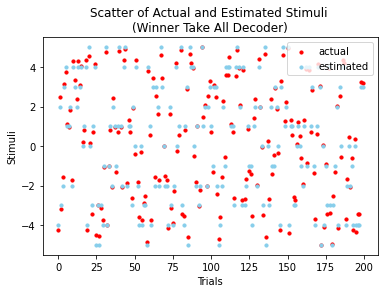

In [22]:
fig_num += 1
plt.figure(fig_num)
plt.xlabel('Trials')
plt.ylabel('Stimuli')
plt.title('Scatter of Actual and Estimated Stimuli \n(Winner Take All Decoder)')
x_index = np.arange(0,numberOfTrials)
plt.scatter(x_index, stimuli, color='r', s=10)
plt.scatter(x_index, est_WTA, color='skyblue', s=10)
plt.legend(['actual', 'estimated'], loc='upper right')
plt.show(block=False)

In [9]:
print('Mean of error:', error_WTA_mean)
print('Standard deviation of error:', error_WTA_std)

Mean of error: 0.2663288643871281
Standard deviation of error: 0.15168019788290255


In [10]:
# Part C

def MLE_decoder(A, x, mu, sigma, response):
    loglikelihood = 0
    loglikelihoods = []
    for i in range(len(x)):
        for k in range(len(mu)):        
            loglikelihood += (response[k] - tuningCurves(A, x[i], mu[k], sigma)) **2
        loglikelihoods.append(loglikelihood)
        loglikelihood = 0
    min_index = np.argmin(loglikelihoods)
    est_stim = x[min_index]
    return est_stim

In [11]:
est_MLE = []
error_MLE = []
for i in range(len(responses_B)):
    est_MLE.append(float(MLE_decoder(1, np.linspace(-5, 5, 500), mu, 1, responses_B[i])))
    error_MLE.append(float(np.abs(stimuli[i] - est_MLE[i])))
error_MLE_mean = np.mean(error_MLE)
error_MLE_std = np.std(error_MLE)

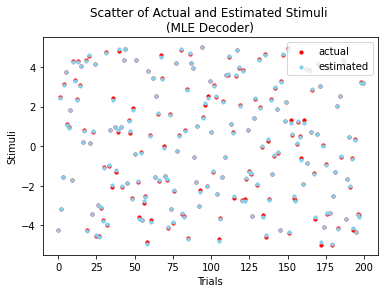

In [12]:
fig_num += 1
plt.figure(fig_num)
plt.xlabel('Trials')
plt.ylabel('Stimuli')
plt.title('Scatter of Actual and Estimated Stimuli \n(MLE Decoder)')
x_index = np.arange(0,numberOfTrials)
plt.scatter(x_index, stimuli, color='r', s=10)
plt.scatter(x_index, est_MLE, color='skyblue', s=10)
plt.legend(['actual', 'estimated'], loc='upper right')
plt.show(block=False)

In [13]:
print('Mean of error:', error_MLE_mean)
print('Standard deviation of error:', error_MLE_std)

Mean of error: 0.04142448115458796
Standard deviation of error: 0.03183150244858742


In [14]:
# Part D

def MAP_decoder(A, x, mu, sigma, response):
    logPosterior = 0
    logPosteriors = []
    for i in range(len(x)):
        for k in range(len(mu)):        
            logPosterior += (response[k] - tuningCurves(A, x[i], mu[k], sigma)) **2
        logPosterior = (logPosterior / (2 * (sigma / 20) ** 2)) + (x[i] ** 2) / (2 * 2.5 ** 2)
        logPosteriors.append(logPosterior)
        logPosterior = 0
    min_index = np.argmin(logPosteriors)
    est_stim = x[min_index]
    return est_stim

In [15]:
est_MAP = []
error_MAP = []
for i in range(len(responses_B)):
    est_MAP.append(float(MAP_decoder(1, np.linspace(-5, 5, 500), mu, 1, responses_B[i])))
    error_MAP.append(float(np.abs(stimuli[i] - est_MAP[i])))
error_MAP_mean = np.mean(error_MAP)
error_MAP_std = np.std(error_MAP)

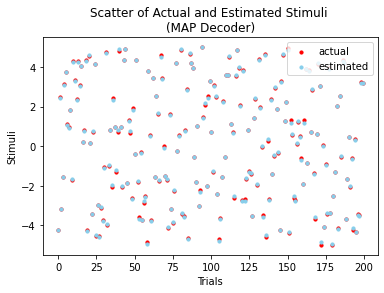

In [16]:
fig_num += 1
plt.figure(fig_num)
plt.xlabel('Trials')
plt.ylabel('Stimuli')
plt.title('Scatter of Actual and Estimated Stimuli \n(MAP Decoder)')
x_index = np.arange(0,numberOfTrials)
plt.scatter(x_index, stimuli, color='r', s=10)
plt.scatter(x_index, est_MAP, color='skyblue', s=10)
plt.legend(['actual', 'estimated'], loc='upper right')
plt.show(block=False)

In [17]:
print('Mean of error:', error_MAP_mean)
print('Standard deviation of error:', error_MAP_std)

Mean of error: 0.04149586321863232
Standard deviation of error: 0.03127356853566808


In [18]:
# Part E

sigmas = [0.1, 0.2, 0.5, 1, 2, 5]

In [19]:
numberOfTrials = 200
responses_E = []
stimuli_E = []
est_MLE_E = []
error_MLE_E = []
errors_MLE_E = []
np.random.seed(5)
for i in range(numberOfTrials):
    response_E = []
    random = 10 * np.random.random_sample() - 5
    stimuli_E.append(random)
    error_MLE_E = []
    for k,sigma in enumerate(sigmas):
        response_E = (tuningCurves(1,stimuli_E[i], mu,sigma)) + np.random.normal(0, 0.05, 21)
        est_MLE_E.append(MLE_decoder(1, np.linspace(-5, 5, 500), mu, sigma, response_E))
        error_MLE_E.append(np.abs(stimuli_E[i] - float(est_MLE_E[i*6 + k])))
        responses_E.append(response_E)
    errors_MLE_E.append(error_MLE_E)
errors_MLE_E = np.array(errors_MLE_E)
est_MLE_E = np.array(est_MLE_E)
responses_E = np.array(responses_E)
stimuli_E = np.array(stimuli_E)

In [20]:
errors_MLE_E_mean = []
errors_MLE_E_std = []
for i in range(len(sigmas)):
    error_MLE_E_mean = np.mean(errors_MLE_E[:,i])
    error_MLE_E_std = np.std(errors_MLE_E[:,i])
    print('sigma = %.1f' % sigmas[i])
    print('Mean of errors', error_MLE_E_mean)
    print('Standard deviation of errors ', error_MLE_E_std)
    print('\n')
    errors_MLE_E_mean.append(error_MLE_E_mean)
    errors_MLE_E_std.append(error_MLE_E_std)
errors_MLE_E_mean = np.array(errors_MLE_E_mean)
errors_MLE_E_std = np.array(errors_MLE_E_std)

sigma = 0.1
Mean of errors 1.9890657370175808
Standard deviation of errors  2.448906135786968


sigma = 0.2
Mean of errors 0.533970544896922
Standard deviation of errors  1.1950532407851018


sigma = 0.5
Mean of errors 0.03569769588945639
Standard deviation of errors  0.032079236966028025


sigma = 1.0
Mean of errors 0.04641636808837287
Standard deviation of errors  0.03708667913017074


sigma = 2.0
Mean of errors 0.05729291259648481
Standard deviation of errors  0.040685873500029966


sigma = 5.0
Mean of errors 0.10065260782811584
Standard deviation of errors  0.07667936215460809




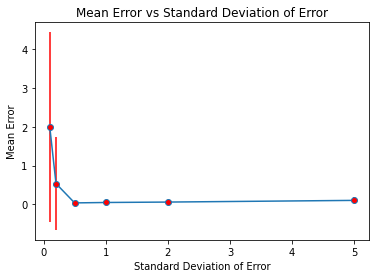

In [21]:
fig_num += 1
plt.figure(fig_num)
plt.xlabel('Standard Deviation of Error')
plt.ylabel('Mean Error')
plt.title('Mean Error vs Standard Deviation of Error')
plt.errorbar(sigmas, errors_MLE_E_mean, yerr=errors_MLE_E_std,
             marker='o', markerfacecolor='r', ecolor='r')

plt.show(block=False)